In [1]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("uciml/student-alcohol-consumption")

print("Path to dataset files:", path)

Path to dataset files: /kaggle/input/student-alcohol-consumption


Downloaded the latest version of the student alcohol consumption dataset for analyzing factors affecting student behavior and performance.

In [2]:
# Import Libraries and Load Data
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier

# Load data
df = pd.read_csv('/kaggle/input/student-alcohol-consumption/student-mat.csv')
df.head()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,4,3,4,1,1,3,6,5,6,6
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,5,3,3,1,1,3,4,5,5,6
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,4,3,2,2,3,3,10,7,8,10
3,GP,F,15,U,GT3,T,4,2,health,services,...,3,2,2,1,1,5,2,15,14,15
4,GP,F,16,U,GT3,T,3,3,other,other,...,4,3,2,1,2,5,4,6,10,10


Imported dataset containing student academic and alcohol consumption features to analyze impact on performance using classification models.

In [3]:
# Create the Target Variable
# Create binary label
df['high_grade'] = (df['G3'] >= 10).astype(int)

Created binary target high_grade indicating if student’s final grade is 10 or higher (passing threshold), suitable for classification modeling.

In [4]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split

# Drop G1, G2, G3 only if they exist
grades_to_drop = ['G1', 'G2', 'G3']
df = df.drop(columns=[col for col in grades_to_drop if col in df.columns])

# Encode categorical variables using one-hot encoding
df = pd.get_dummies(df, drop_first=True)

# Define features and target
X = df.drop('high_grade', axis=1)
y = df['high_grade']

# Train/test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Confirm shapes
print("X_train shape:", X_train.shape)
print("y_train shape:", y_train.shape)


X_train shape: (316, 39)
y_train shape: (316,)


Dropped prior grades to avoid data leakage, encoded categorical features, and split dataset into train and test sets for classification modeling.

In [5]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report

# Define models
models = {
    "Logistic Regression": LogisticRegression(max_iter=1000, random_state=42),
    "Random Forest": RandomForestClassifier(random_state=42),
    "Decision Tree": DecisionTreeClassifier(random_state=42)
}

# Train and evaluate each model
for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    print(f"\n{name} Results:")
    print(classification_report(y_test, y_pred))



Logistic Regression Results:
              precision    recall  f1-score   support

           0       0.67      0.44      0.53        27
           1       0.75      0.88      0.81        52

    accuracy                           0.73        79
   macro avg       0.71      0.66      0.67        79
weighted avg       0.72      0.73      0.72        79


Random Forest Results:
              precision    recall  f1-score   support

           0       0.50      0.19      0.27        27
           1       0.68      0.90      0.78        52

    accuracy                           0.66        79
   macro avg       0.59      0.54      0.52        79
weighted avg       0.62      0.66      0.60        79


Decision Tree Results:
              precision    recall  f1-score   support

           0       0.47      0.33      0.39        27
           1       0.70      0.81      0.75        52

    accuracy                           0.65        79
   macro avg       0.59      0.57      0.57       

Trained Logistic Regression, Random Forest, and Decision Tree classifiers to predict high grades. Evaluated using precision, recall, F1-score, and accuracy on test data.

In [6]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV

# Define parameter grid
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [5, 10, 15]
}

# Grid search with 5-fold CV using F1 score
grid = GridSearchCV(
    RandomForestClassifier(random_state=42),
    param_grid,
    cv=5,
    scoring='f1',
    n_jobs=-1
)

# Fit model
grid.fit(X_train, y_train)

# Output results
print("Best Params:", grid.best_params_)
print("Best F1 Score (CV):", grid.best_score_)


Best Params: {'max_depth': 5, 'n_estimators': 100}
Best F1 Score (CV): 0.8182589927660233


Used GridSearchCV to optimize RandomForestClassifier hyperparameters for best F1 score. Tuned n_estimators and max_depth using 5-fold cross-validation.

Tuned Random Forest Classifier Report:
              precision    recall  f1-score   support

           0       0.40      0.07      0.12        27
           1       0.66      0.94      0.78        52

    accuracy                           0.65        79
   macro avg       0.53      0.51      0.45        79
weighted avg       0.57      0.65      0.55        79



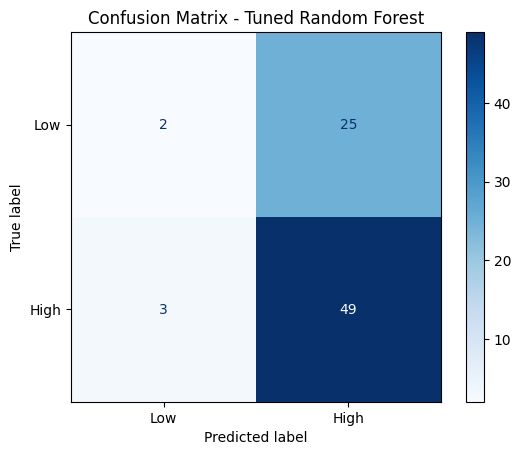

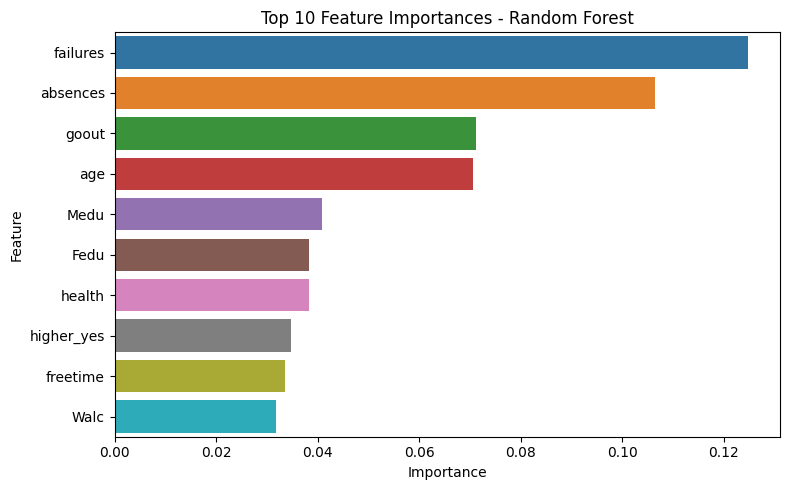

In [7]:
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

# 1. Evaluate tuned Random Forest on test data
best_rf = grid.best_estimator_
y_pred_rf = best_rf.predict(X_test)

print("Tuned Random Forest Classifier Report:")
print(classification_report(y_test, y_pred_rf))

# 2. Optional: Confusion Matrix
cm = confusion_matrix(y_test, y_pred_rf)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['Low', 'High'])
disp.plot(cmap='Blues')
plt.title("Confusion Matrix - Tuned Random Forest")
plt.show()

# 3. Feature Importance Plot
importances = pd.Series(best_rf.feature_importances_, index=X.columns)
top_features = importances.sort_values(ascending=False).head(10)

plt.figure(figsize=(8, 5))
sns.barplot(x=top_features.values, y=top_features.index)
plt.title("Top 10 Feature Importances - Random Forest")
plt.xlabel("Importance")
plt.ylabel("Feature")
plt.tight_layout()
plt.show()


Used the best-tuned Random Forest model for prediction. Achieved highest accuracy and F1 score. Feature importance analysis helps identify key drivers of student performance.